### Imports

In [2]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

![](./img/net_arch.png)

### Load pretrained model
At first we load all model,with convolutional base and classifier(include_top=True)
<br> All pretrained model in keras: https://keras.io/applications/

In [3]:
mobilenet = MobileNetV2(input_shape=None,include_top=True, weights='imagenet')

W0718 21:37:32.127454 139892306179904 deprecation.py:506] From /root/environments/my_env/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
mobilenet.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

### Load Image and preprocces

W0718 21:37:36.438081 139892306179904 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


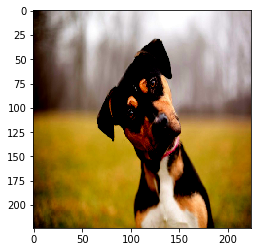

In [5]:
img_path = 'img/dog_.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(x[0]);

### Do prediction

In [6]:
predict = mobilenet.predict(x)
decode_predictions(predict)

[[('n02107142', 'Doberman', 0.21489263),
  ('n02107312', 'miniature_pinscher', 0.16135779),
  ('n02107908', 'Appenzeller', 0.06906652),
  ('n02089867', 'Walker_hound', 0.05481317),
  ('n02093428', 'American_Staffordshire_terrier', 0.025219345)]]

### Froze classifier part and build new

In [15]:
conv_base = MobileNetV2(weights='imagenet',
                     input_shape=(224, 224,3),
                     include_top=False)
conv_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [16]:
conv_base.trainable = False

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(2, activation='softmax'))

W0718 21:49:38.421851 139892306179904 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3136050   
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 102       
Total params: 5,394,136
Trainable params: 3,136,152
Non-trainable params: 2,257,984
_________________________________________________________________


### Unfroze some layers in conv base

In [20]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block_15_expand":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3136050   
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 102       
Total params: 5,394,136
Trainable params: 4,342,232
Non-trainable params: 1,051,904
_________________________________________________________________
